In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pandas.plotting import autocorrelation_plot
from pandas import Series
import plotly.express as px
import copy as cop
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import preprocessing
from sklearn.utils.graph_shortest_path import graph_shortest_path

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import normalize

from sklearn.decomposition import PCA
def code_mean(data,category,real):
    return (data[category].map(data.groupby(category)[real].mean()))

In [2]:
df = pd.read_csv('flavors_of_cacao.csv')
print(df)
print(df.columns)

       Company Specific Bean Origin or Bar Name   REF  Review\nDate  \
0     A. Morin                      Agua Grande  1876          2016   
1     A. Morin                            Kpime  1676          2015   
2     A. Morin                           Atsane  1676          2015   
3     A. Morin                            Akata  1680          2015   
4     A. Morin                           Quilla  1704          2015   
...        ...                              ...   ...           ...   
1790    Zotter                             Peru   647          2011   
1791    Zotter                            Congo   749          2011   
1792    Zotter                     Kerala State   749          2011   
1793    Zotter                     Kerala State   781          2011   
1794    Zotter               Brazil, Mitzi Blue   486          2010   

     Cocoa\nPercent Company\nLocation  Rating Bean\nType Broad Bean\nOrigin  
0               63%            France    3.75                      Sa

In [3]:
print(df.isnull().sum())
print("Есть отсутствующие данные:")
print(df.isnull().values.any())

Company                             0
Specific Bean Origin or Bar Name    0
REF                                 0
Review\nDate                        0
Cocoa\nPercent                      0
Company\nLocation                   0
Rating                              0
Bean\nType                          1
Broad Bean\nOrigin                  1
dtype: int64
Есть отсутствующие данные:
True


In [4]:
df=df.rename(columns={'Company':'company','Specific Bean Origin or Bar Name':'specificBean','REF':'ref','Review\nDate':'reviewDate','Cocoa\nPercent':'cocoaPercent','Company\nLocation':'companyLocation','Rating':'rating','Bean\nType':'beanType','Broad Bean\nOrigin':'broadBeanOrigin'})
print(df.columns)

Index(['company', 'specificBean', 'ref', 'reviewDate', 'cocoaPercent',
       'companyLocation', 'rating', 'beanType', 'broadBeanOrigin'],
      dtype='object')


In [5]:
df.iloc[1]

company            A. Morin
specificBean          Kpime
ref                    1676
reviewDate             2015
cocoaPercent            70%
companyLocation      France
rating                 2.75
beanType                   
broadBeanOrigin        Togo
Name: 1, dtype: object

In [6]:
df['cocoaPercent'] = df['cocoaPercent'].str.replace('%','').astype(float)/100

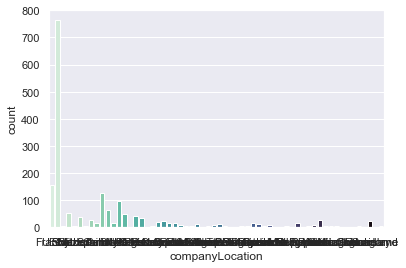

In [7]:
sns.countplot(x='companyLocation', data=df, palette="mako_r")
plt.show()

In [8]:
df['companyLocation'].value_counts().head(15)

U.S.A.         764
France         156
Canada         125
U.K.            96
Italy           63
Ecuador         54
Australia       49
Belgium         40
Switzerland     38
Germany         35
Austria         26
Spain           25
Colombia        23
Hungary         22
Venezuela       20
Name: companyLocation, dtype: int64

In [9]:
df['specificBean'].value_counts().head(20)

Madagascar            57
Peru                  45
Ecuador               42
Dominican Republic    37
Venezuela             21
Sambirano             19
Chuao                 19
Ocumare               17
Ghana                 15
Papua New Guinea      15
Belize                13
Bolivia               12
Grenada               11
Trinidad              11
Costa Rica            11
Porcelana             11
Tanzania              11
Brazil                11
La Red                11
Carenero Superior     10
Name: specificBean, dtype: int64

In [10]:
df['company'].value_counts().head(20)

Soma                          47
Bonnat                        27
Fresco                        26
Pralus                        25
A. Morin                      23
Arete                         22
Domori                        22
Guittard                      22
Valrhona                      21
Hotel Chocolat (Coppeneur)    19
Mast Brothers                 18
Coppeneur                     18
Zotter                        17
Scharffen Berger              17
Rogue                         16
Artisan du Chocolat           16
Dandelion                     16
Smooth Chocolator, The        16
Szanto Tibor                  15
Pierre Marcolini              14
Name: company, dtype: int64

In [11]:
df['broadBeanOrigin'].value_counts().head(20)

Venezuela             214
Ecuador               193
Peru                  165
Madagascar            145
Dominican Republic    141
                       73
Nicaragua              60
Brazil                 58
Bolivia                57
Belize                 49
Papua New Guinea       42
Colombia               40
Vietnam                38
Costa Rica             38
Tanzania               34
Trinidad               33
Ghana                  33
Mexico                 30
Guatemala              28
Hawaii                 28
Name: broadBeanOrigin, dtype: int64

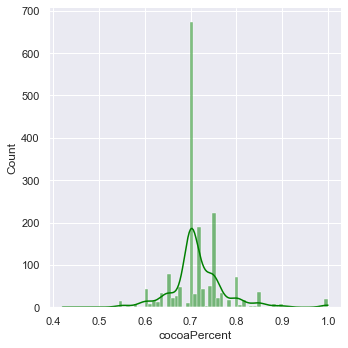

c:\users\nikit\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

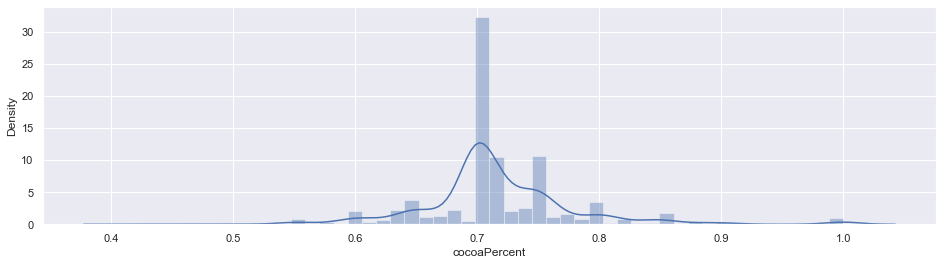

In [12]:
sns.displot(data=df,x='cocoaPercent',kde=True,color='green')
plt.show()
fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(df['cocoaPercent'], ax=ax)
plt.show

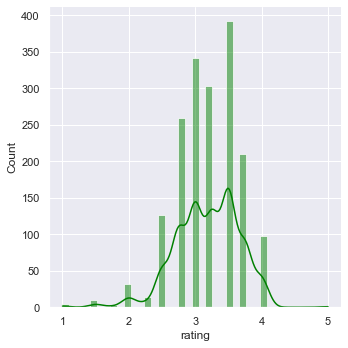

In [13]:
sns.displot(data=df,x='rating',kde=True,color='green')
plt.show()

In [14]:
df['beanType'] = df['beanType'].str.strip().replace('','empty')
print(df['beanType'].value_counts().head(20))

empty                     887
Trinitario                419
Criollo                   153
Forastero                  87
Forastero (Nacional)       52
Blend                      41
Criollo, Trinitario        39
Forastero (Arriba)         37
Criollo (Porcelana)        10
Trinitario, Criollo         9
Forastero (Parazinho)       8
Forastero (Arriba) ASS      6
EET                         3
Nacional (Arriba)           3
Beniano                     3
Matina                      3
Amazon mix                  2
Trinitario, Forastero       2
Criollo, Forastero          2
Amazon, ICS                 2
Name: beanType, dtype: int64


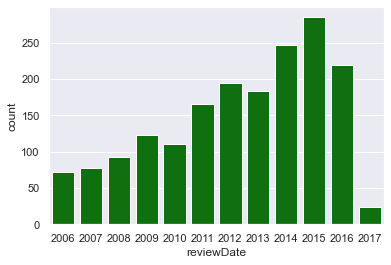

In [15]:
sns.countplot(data=df,x='reviewDate',color='green')
plt.show()

In [16]:
print(df['specificBean'].value_counts().head(20))
print(df['broadBeanOrigin'].value_counts().head(20))

Madagascar            57
Peru                  45
Ecuador               42
Dominican Republic    37
Venezuela             21
Sambirano             19
Chuao                 19
Ocumare               17
Ghana                 15
Papua New Guinea      15
Belize                13
Bolivia               12
Grenada               11
Trinidad              11
Costa Rica            11
Porcelana             11
Tanzania              11
Brazil                11
La Red                11
Carenero Superior     10
Name: specificBean, dtype: int64
Venezuela             214
Ecuador               193
Peru                  165
Madagascar            145
Dominican Republic    141
                       73
Nicaragua              60
Brazil                 58
Bolivia                57
Belize                 49
Papua New Guinea       42
Colombia               40
Vietnam                38
Costa Rica             38
Tanzania               34
Trinidad               33
Ghana                  33
Mexico                 30

<AxesSubplot:xlabel='rating', ylabel='beanType'>

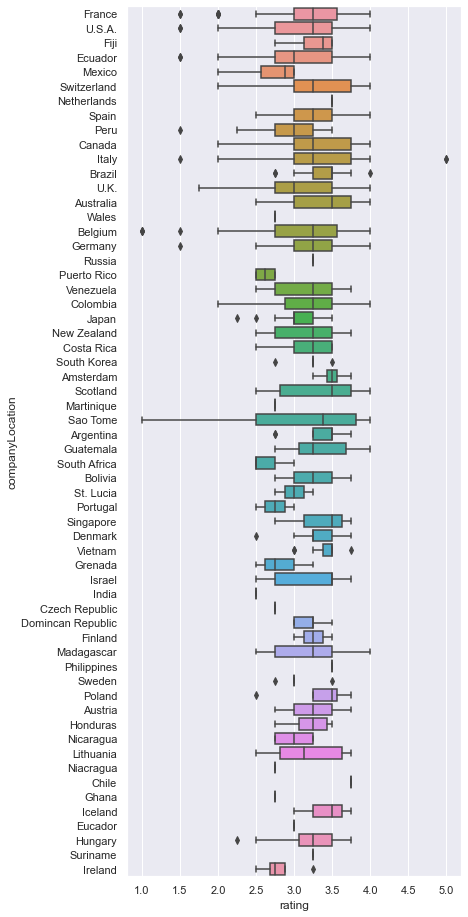

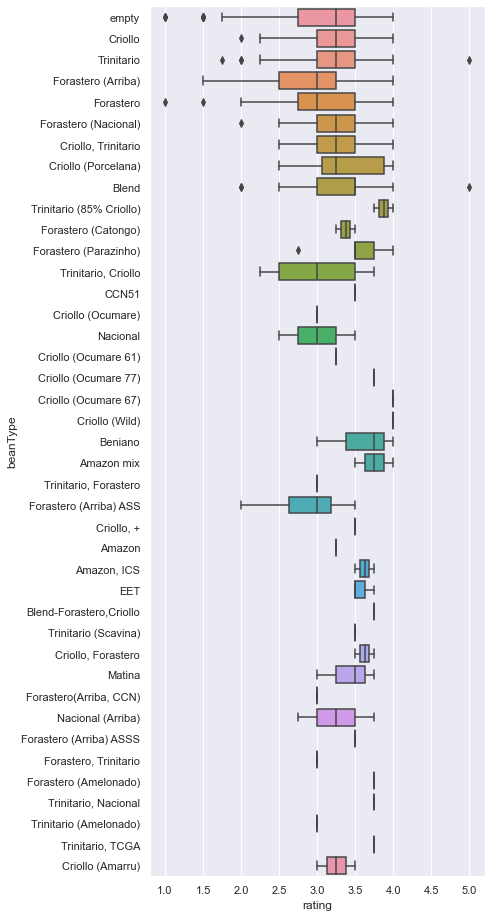

In [17]:
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=df,
    y='companyLocation',
    x='rating'
)
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=df,
    y='beanType',
    x='rating'
)


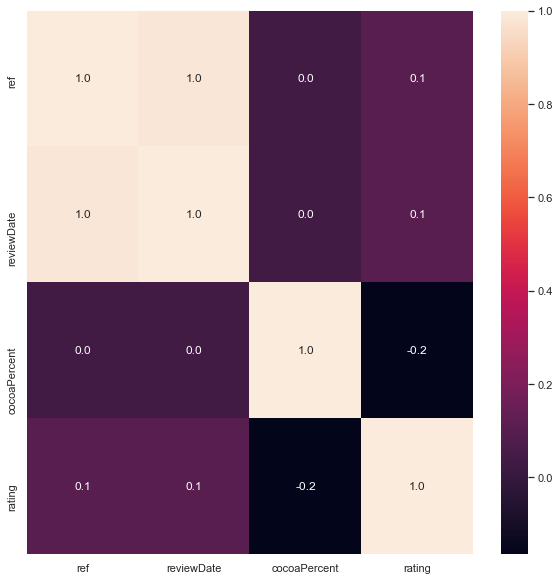

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

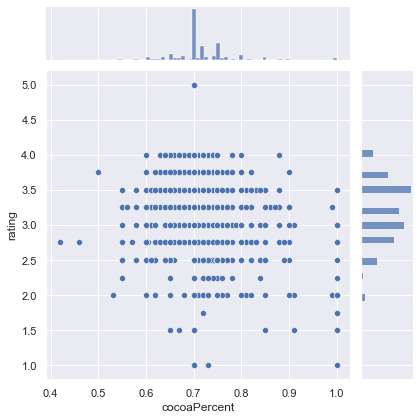

In [19]:
#df2 = df.drop(['ref'],axis=1)
#fig = px.scatter_matrix(df2)
#fig.show()
sns.jointplot(data=df,x='cocoaPercent',y='rating')
plt.show()

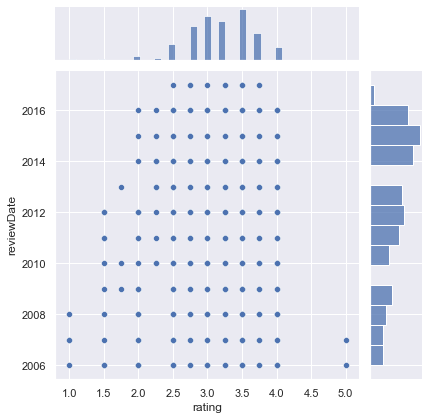

In [20]:
sns.jointplot(data=df,x='rating',y='reviewDate')
plt.show()

In [21]:
def code_mean(data,category,real):
    return (data[category].map(data.groupby(category)[real].mean()))
df3 = cop.deepcopy(df)
df3['location_rating'] = code_mean(df3,'companyLocation','rating')
df3['broadBeanOrigin_rating'] = code_mean(df3,'broadBeanOrigin','rating')
df3['beanType_rating'] = code_mean(df3,'beanType','rating')
df3 =df3.drop(['company','specificBean','broadBeanOrigin','ref','companyLocation','beanType'],axis=1)
df3 = df3.dropna(how='any',axis=0) 
print(df3.corr())


                        reviewDate  cocoaPercent    rating  location_rating  \
reviewDate                1.000000      0.038115  0.100332        -0.021323   
cocoaPercent              0.038115      1.000000 -0.164758        -0.028039   
rating                    0.100332     -0.164758  1.000000         0.239751   
location_rating          -0.021323     -0.028039  0.239751         1.000000   
broadBeanOrigin_rating    0.138526      0.040475  0.273928         0.166993   
beanType_rating           0.019464     -0.015559  0.224783         0.183065   

                        broadBeanOrigin_rating  beanType_rating  
reviewDate                            0.138526         0.019464  
cocoaPercent                          0.040475        -0.015559  
rating                                0.273928         0.224783  
location_rating                       0.166993         0.183065  
broadBeanOrigin_rating                1.000000         0.153222  
beanType_rating                       0.153222    

In [22]:
df1 = cop.deepcopy(df)
df1['locationCount'] =df1['companyLocation'].map(df1.groupby('companyLocation').size())
df1['broadBeanOriginCount'] =df1['broadBeanOrigin'].map(df1.groupby('broadBeanOrigin').size())
df1['beanTypeCount'] =df1['beanType'].map(df1.groupby('beanType').size())
df1['specificBeanCount'] =df1['specificBean'].map(df1.groupby('specificBean').size())
df1 =df1.drop(['company','specificBean','broadBeanOrigin','ref','companyLocation','beanType'],axis=1)
df1 = df1.dropna(how='any',axis=0)
col=['reviewDate','cocoaPercent', 'rating','locationCount','broadBeanOriginCount','beanTypeCount','specificBeanCount']

Качество кластеризации: 0.305
          reviewDate  cocoaPercent    rating  locationCount  \
Cluster                                                       
0        2011.307823      0.719524  3.252976      63.539116   
1        2013.186517      0.714382  3.125281     764.000000   
2        2012.484277      0.716274  3.196541     764.000000   
3        2012.701357      0.716765  3.149887      69.260181   

         broadBeanOriginCount  beanTypeCount  specificBeanCount  Amount  
Cluster                                                                  
0                  106.452381     227.287415           7.693878     588  
1                  103.006742     887.000000           9.301124     445  
2                  102.069182     251.946541           9.157233     318  
3                   97.798643     887.000000           7.144796     442  


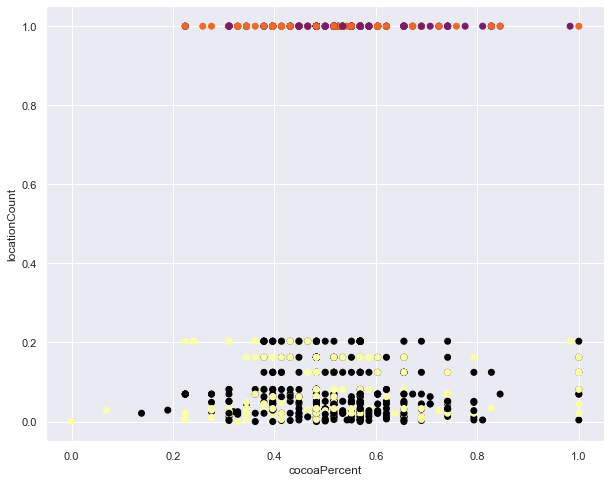

In [23]:
dataNorm = preprocessing.MinMaxScaler().fit_transform(df1.values)
kmeans = KMeans(n_clusters = 4)
kmeans.fit(dataNorm)
silhouette_avg = silhouette_score(dataNorm, kmeans.labels_)
print("Качество кластеризации: "+str(round(silhouette_avg,3)))
df1['Cluster']=kmeans.labels_
res=df1.groupby('Cluster')[col].mean()
res['Amount']=df1.groupby('Cluster').size().values
print(res)
x=1
y=3
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=kmeans.labels_, cmap='inferno')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()




[3 3 3 ... 2 3 3]
Качество кластеризации: 0.385
          reviewDate  cocoaPercent    rating  locationCount  \
Cluster                                                       
1        2011.155556      0.712222  3.177778      51.266667   
2        2011.320442      0.720129  3.259208      64.556169   
3        2012.701357      0.716765  3.149887      69.260181   
4        2012.893840      0.715170  3.154980     764.000000   

         broadBeanOriginCount  beanTypeCount  specificBeanCount  Amount  
Cluster                                                                  
1                  153.355556     300.444444          53.022222      45  
2                  102.565378     221.224678           3.937385     543  
3                   97.798643     887.000000           7.144796     442  
4                  102.615990     622.325033           9.241153     763  


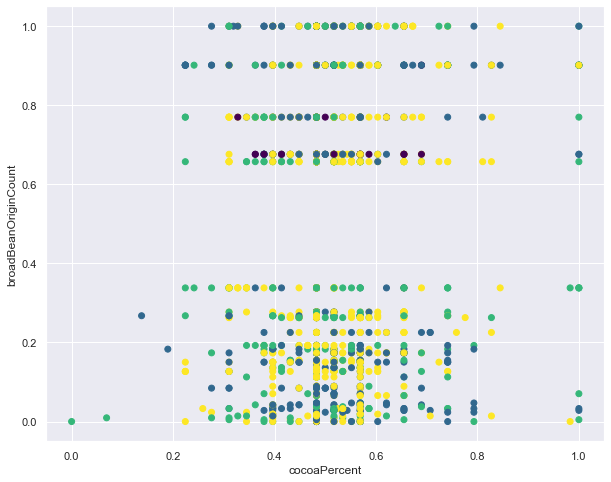

In [24]:
dataNorm = preprocessing.MinMaxScaler().fit_transform(df1.values)
data_dist = pdist(dataNorm, 'euclidean')
data_linkage = linkage(data_dist, method='average')
clusters=fcluster(data_linkage, 4, criterion='maxclust')
print(clusters)
silhouette_avg = silhouette_score(dataNorm, clusters)
print("Качество кластеризации: "+str(round(silhouette_avg,3)))
df1['Cluster']=clusters
res=df1.groupby('Cluster')[col].mean()
res['Amount']=df1.groupby('Cluster').size().values
print(res)
col=['reviewDate','cocoaPercent', 'rating','locationCount','broadBeanOriginCount','beanTypeCount','specificBeanCount']
x=1 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=4 #
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='viridis')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()



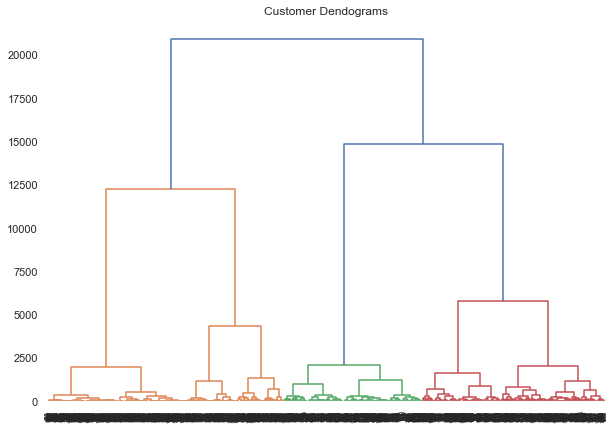

In [37]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df1, method='ward'))



In [25]:
from sklearn import preprocessing
df2 = cop.deepcopy(df)
df2['locationCount'] =df2['companyLocation'].map(df2.groupby('companyLocation').size())
df2['broadBeanOriginCount'] =df2['broadBeanOrigin'].map(df2.groupby('broadBeanOrigin').size())
df2['beanTypeCount'] =df2['beanType'].map(df2.groupby('beanType').size())
df2 =df2.drop(['company','specificBean','broadBeanOrigin','ref','companyLocation','beanType','beanTypeCount','reviewDate'],axis=1)
df2 = df2.dropna(how='any',axis=0) 
col=['cocoaPercent', 'rating','locationCount','broadBeanOriginCount']

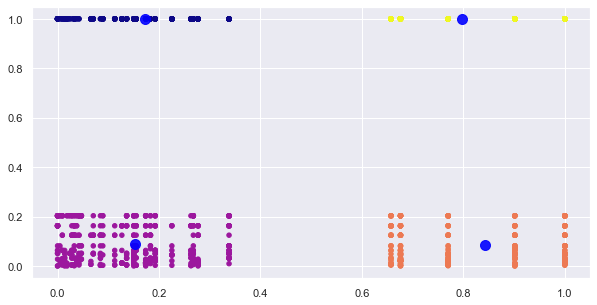

Качество кластеризации: 0.619
         cocoaPercent    rating  locationCount  broadBeanOriginCount  Amount
Cluster                                                                     
0            0.719330  3.226289      64.346392            180.432990     485
1            0.712500  3.150641     764.000000             37.512821     390
2            0.717962  3.159517     764.000000            170.686327     373
3            0.717427  3.194597      67.565934             33.538462     546


In [26]:
dataNorm = preprocessing.MinMaxScaler().fit_transform(df2.values)
kmeans = KMeans(n_clusters = 4)
kmeans.fit(dataNorm)
y_kmeans = kmeans.predict(dataNorm)
plt.figure(figsize=(10, 5))
plt.scatter(dataNorm[:, 3], dataNorm[:, 2], c = y_kmeans, s = 20, cmap = 'plasma')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 3], centers[:, 2], c = 'blue', s = 100, alpha = 0.9);
plt.show()

kmeans.fit(dataNorm)
silhouette_avg = silhouette_score(dataNorm, kmeans.labels_)
print("Качество кластеризации: "+str(round(silhouette_avg,3)))

df2['Cluster']=kmeans.labels_
res=df2.groupby('Cluster')[col].mean()
res['Amount']=df2.groupby('Cluster').size().values
print(res)




Качество кластеризации: 0.722
         cocoaPercent    rating  locationCount  broadBeanOriginCount  Amount
Cluster                                                                     
1            0.719330  3.226289      64.346392            180.432990     485
2            0.717427  3.194597      67.565934             33.538462     546
3            0.712500  3.150641     764.000000             37.512821     390
4            0.717962  3.159517     764.000000            170.686327     373


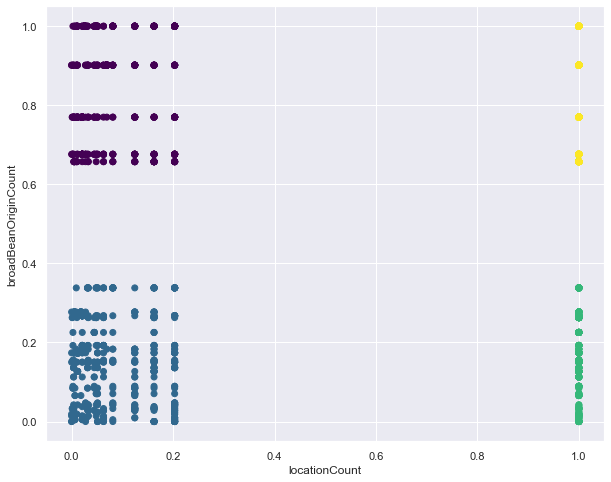

In [27]:
dataNorm = preprocessing.MinMaxScaler().fit_transform(df2.values)
data_dist = pdist(dataNorm, 'euclidean')
data_linkage = linkage(data_dist, method='average')
clusters=fcluster(data_linkage, 4, criterion='maxclust')
silhouette_avg = silhouette_score(dataNorm, clusters)
print("Качество кластеризации: "+str(round(silhouette_avg,3)))
df2['Cluster']=clusters
res=df2.groupby('Cluster')[col].mean()
res['Amount']=df2.groupby('Cluster').size().values
print(res)
x=2
y=3 
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='viridis')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

Качество кластеризации: 0.66


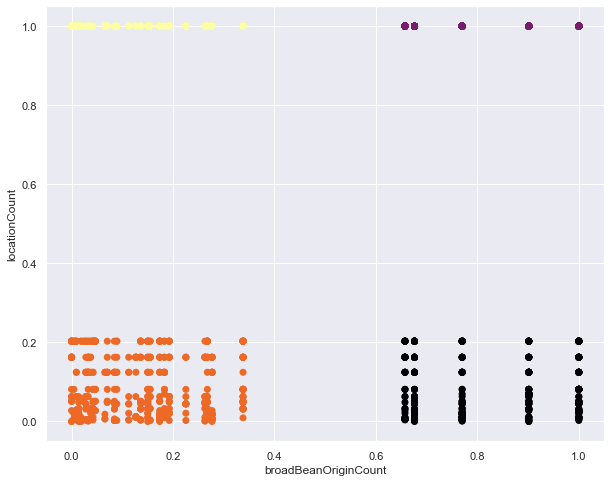

cocoaPercent              0.70
rating                    3.75
locationCount           764.00
broadBeanOriginCount     34.00
Cluster                   3.00
Name: 100, dtype: float64
Cluster:2
Object class:2
cocoaPercent              0.75
rating                    3.50
locationCount           156.00
broadBeanOriginCount      7.00
Cluster                   2.00
Name: 10, dtype: float64
         cocoaPercent    rating  locationCount  broadBeanOriginCount  Amount
Cluster                                                                     
0            0.719330  3.226289      64.346392            180.432990     485
1            0.717962  3.159517     764.000000            170.686327     373
2            0.717427  3.194597      67.565934             33.538462     546
3            0.712500  3.150641     764.000000             37.512821     390


<ipython-input-28-b251b8024057>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obj['cocoaPercent'] = 0.75
<ipython-input-28-b251b8024057>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obj['rating'] = 3.5


In [28]:
dataNorm = preprocessing.MinMaxScaler().fit_transform(df2.values)
kmeans = KMeans(n_clusters = 4)
kmeans.fit(dataNorm)
silhouette_avg = silhouette_score(dataNorm, kmeans.labels_)
print("Качество кластеризации: "+str(round(silhouette_avg,3)))
x=3
y=2
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=kmeans.labels_, cmap='inferno')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

import numpy as np
import scipy as sp
from scipy.spatial import distance
from sklearn.cluster import KMeans
def kmeans_predict(kmeans_model, X_new,numCl,metric=sp.spatial.distance.cosine):
    dis = []
    for i, x_core in enumerate(kmeans_model.cluster_centers_):
        dis.append(distance.euclidean(X_new[0], x_core))
    min = dis[0]
    index = 0
    for i in range(0,len(dis)):
        if min > dis[i]:
            min = dis[i]
            index = i
    return kmeans_model.labels_[index]
y = kmeans_predict(kmeans,df2.iloc[100],4)
print(df2.iloc[100])
print("Cluster:"+str(y))
obj = df2.iloc[10]
obj['cocoaPercent'] = 0.75
obj['rating'] = 3.5
y = kmeans_predict(kmeans,obj,4)
print("Object class:"+str(y))
print(obj)
df2['Cluster']=kmeans.labels_
res=df2.groupby('Cluster')[col].mean()
res['Amount']=df2.groupby('Cluster').size().values
print(res)


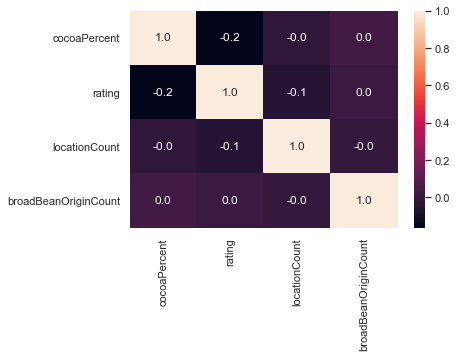

In [29]:
df4 = cop.deepcopy(df)
df4.corr()
df4['locationCount'] =df4['companyLocation'].map(df4.groupby('companyLocation').size())
df4['broadBeanOriginCount'] =df4['broadBeanOrigin'].map(df4.groupby('broadBeanOrigin').size())
df4['beanTypeCount'] =df4['beanType'].map(df4.groupby('beanType').size())
df4 =df4.drop(['company','specificBean','broadBeanOrigin','ref','companyLocation','beanType','beanTypeCount','reviewDate'],axis=1)
df4 = df4.dropna(how='any',axis=0)
sns.heatmap(df4.corr(),annot=True,fmt='.1f')
plt.show()